# STAT201 FINAL REPORT 
### Comparison Of Cyber Security Professional Salaries During the COVID-19 Pandemic 

#### **Group 25**: 

#### Antarip Kashyap, Joel Bonnie, Renata Lovette, Zhen Wang 


## Introduction
Cyber Security is a fast growing and essential sector of the Information Technology industry. It deals with securing computer based systems and networks, and resolving the increasing threats to private companies and government institutions.

In this project we aim to analyze a sample of salaries for cyber security professionals by determining whether there was a general difference in the salaries received by professionals in 2021 and 2022 (i.e., during the COVID 19 pandemic). The explanatory variable and response variable in our project would be the work year and the salary.. Thus, using the mean salary for the location parameter and the standard deviation for the scale parameter is appropriate to compare salaries between years.

Our dataset, obtained from **Infosec-Jobs**, was created through a survey collecting salaries of cybersecurity and infosec professionals. The variables in the dataset we would be interested in are the `work_year` and `salary_in_usd` variable. The former corresponds to the work year and the latter corresponds to the gross salary of a given worker (converted to USD). 

According to a study done by Lallie et. al. -  ‘The increased anxiety caused by the pandemic heightened the likelihood of cyber-attacks succeeding corresponding with an increase in the number and range of cyber-attacks’. The COVID-19 Pandemic resulted in many institutions switching most of their operations to an online medium. Muthuppalaniappan and Stevenson stated that healthcare organizations and universities are now also facing heightened cyber-security threats in the midst of the pandemic. 

**We wish to hypothesize whether this tremendous increase in cyber warfare from the onset of the pandemic has had a statistically significant impact on cybersecurity salaries.**


## Preliminary Analysis

First, we will import the required libraries that we intend to use in this report:

In [19]:
# Importing required libraries

library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)


The dataset was saved to the project repository hosted on GitHub, allowing us to read the data directly from the web. 
We can take a look at the first few rows using the head function:

In [20]:
# reading the dataset

money <- read_csv('https://raw.githubusercontent.com/joelbonnie/stat201Project/main/salaries.csv')
head(money)

Rows: 2323 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): experience_level, employment_type, job_title, salary_currency, empl...
dbl (4): work_year, salary, salary_in_usd, remote_ratio

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
2023,SE,FT,Security Engineer,150000,USD,150000,US,0,US,M
2023,SE,FT,Security Engineer,120000,USD,120000,US,0,US,M
2023,SE,FT,Security Engineer,120000,USD,120000,US,0,US,M
2023,SE,FT,Security Engineer,85000,USD,85000,US,0,US,M
2023,SE,FT,Security Engineer,240500,USD,240500,US,0,US,M
2023,SE,FT,Security Engineer,137500,USD,137500,US,0,US,M


*Table 1*

<br>The columns we wish to consider for this analysis are the following:
`work_year` <br>
`salary_in_usd` <br>

We will filter the columns for the years 2021 and 2022.

In [27]:
# tidy data frame to include only work_year and salary_in_usd columns 
# corresponding to the 2021 and 2022 work year.
money_relevant <- money |>
    filter(work_year == 2021 | work_year == 2022) |>
    select(work_year, salary_in_usd)

# convert the work_year column as factor
money_relevant$work_year <- as.factor(money_relevant$work_year)

head(money_relevant)

work_year,salary_in_usd
<fct>,<dbl>
2022,126080
2022,60000
2021,6085
2022,64000
2022,117000
2022,75000


*Table 2*

<br>Now, lets calculate the sample statistics!
- `mean_wage` corresponds to the mean salary for the given year. 
- `sd_wage` corresponds to the standard deviation of the salaries for the given year.
- `n` corresponds to the number of entries in each year.

In [24]:
# calculate the mean wage, standard deviation of the wage and number of observations for each work year
annual_average <- money_relevant |> 
    filter(!is.na(salary_in_usd)) |>
    group_by(work_year) |>
    summarize(mean_wage = mean(salary_in_usd), sd_wage = sd(salary_in_usd),
             n = n())
annual_average

work_year,mean_wage,sd_wage,n
<fct>,<dbl>,<dbl>,<int>
2021,105728.4,57923.03,485
2022,133228.4,60346.89,1067


*Table 3*


<br>Visualizing this using a boxplot:

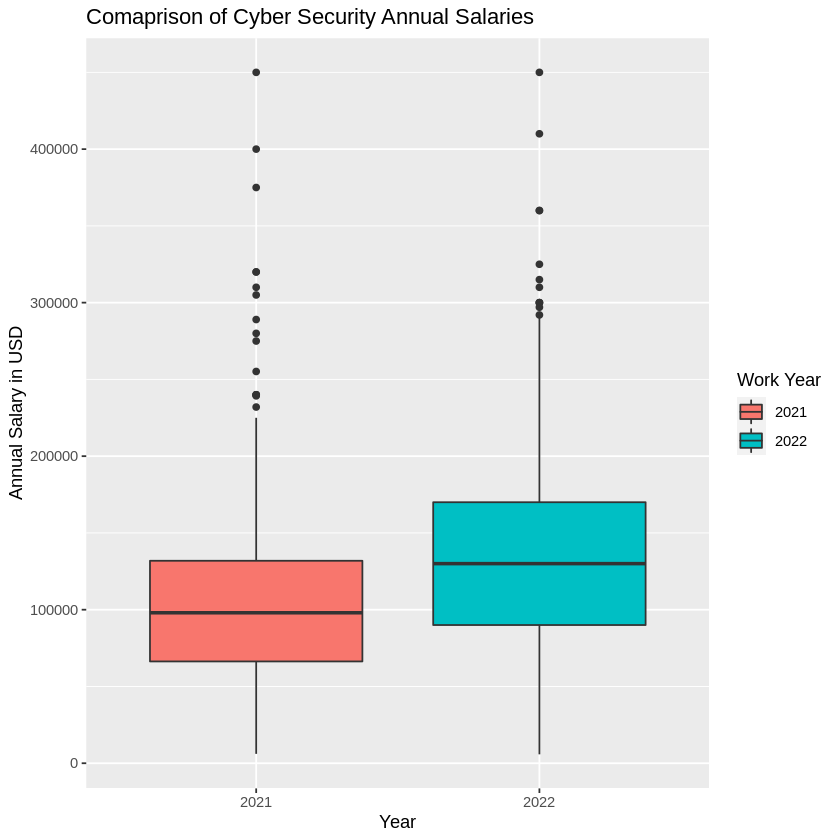

In [57]:
# Using a box plot, we compare the average annual salaries of 2021 and 2022. 
options(scipen = 5000)
aa_graph <- money_relevant |>   
    ggplot() +
    geom_boxplot(aes(x = work_year, y = salary_in_usd, fill = work_year)) +
    xlab("Year") +
    ylab("Annual Salary in USD") +
    labs(fill = "Work Year")+
    ggtitle("Comaprison of Cyber Security Annual Salaries")
aa_graph

*Figure 1*

The boxplot shows that the average annual salary is greater in 2022 and in 2021, suggesting that there is a **general increase in the salaries for jobs within cyber security.** <br>

**TODO:** comment on the spread of the two groups from the boxplot

<br>Let's also create a overlaid histogram showing the variation of salaries for the two specified years:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



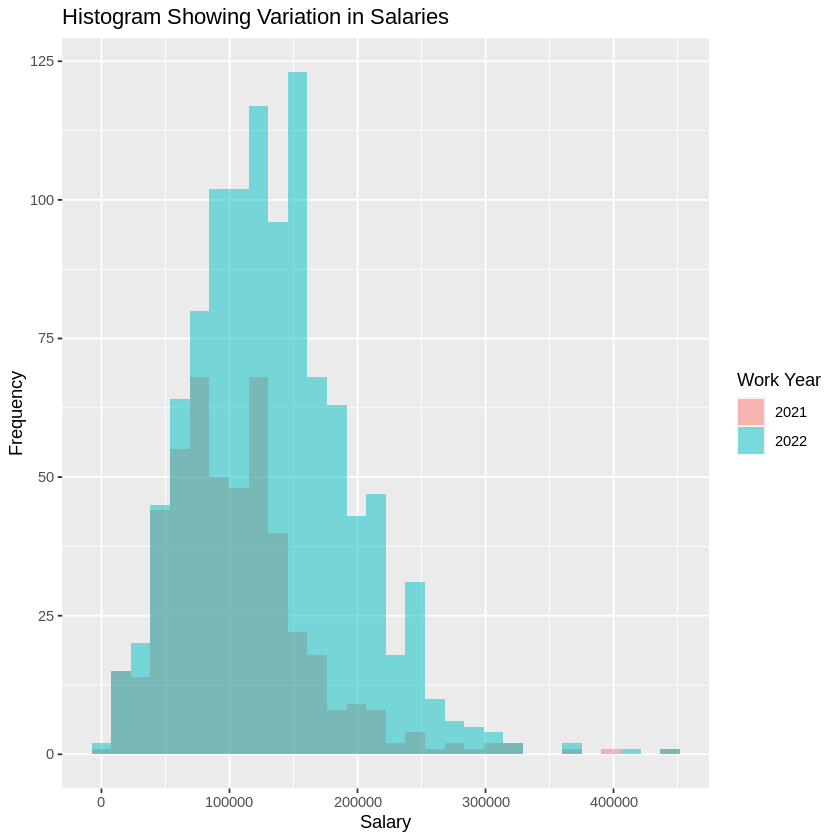

In [55]:
# creating the histogram with an alpha value of 0.5 and filling by the work year
options(scipen = 5000)
salaryHistogram <- money_relevant |>
    ggplot()+
    geom_histogram(aes(x = salary_in_usd,fill = work_year), 
                   alpha = 0.5, position = "identity") + 
    labs(x = "Salary", y = "Frequency", fill = "Work Year") +
    ggtitle("Histogram Showing Variation in Salaries")


salaryHistogram

*Plot 2*

<br>**TODO:** comment on the difference in frequency

## Methods

### Plan:
Due to the difference in the mean salaries, it would be pertinent to investigate whether there is truly an increase in the mean salary between the two years. Our plots and the acquisition of the mean values from the dataset is not sufficient to indicate such an increase since a single sample and the statistics gained from them are not representative of the entire population and the corresponding population parameters.

We will bootstrap the sample to gain an insight into the overall sampling distribution.

We will also perform a hypothesis test of the following hypotheses, where we indicate Population 2 to be salaries in 2022 and Population 1 to be salaries in 2021:

<div align="center"> $H_0: \mu_2 - \mu_1 = 0$ </div>

<div align="center"> $H_1: \mu_2 - \mu_1 ≠ 0$ </div>

- $\mu_1$ refers the population mean of Population 1, that is, Cyber Security salaries in 2021
- $\mu_2$ refers to the population mean of Population 2, that is, Cyber Security salaries in 2022


We will make use of the **Central Limit Theorem**. This is to ensure the test is less computationally intensive and since we are unaware of the population distribution.

Since we are testing for **difference in means**, we will be using a t-test with (n1-1) + (n2-1) degrees of freedom. With n1 and n2 being the total number of observations in 2021 and 2022, respectively.
We expect to reject our null hypothesis and include a 90% confidence interval in our report from the bootstrapped sampling distribution that we gained.


### Reflection:
These findings could be impactful to the field of cyber security as increasing salaries show the significance of this field and encourage graduates to pursue cyber security due to the stable income that current professionals receive. 

The dataset differentiates between different job titles (ie. Cyber Program Manager, Security Analyst, etc.) but in our report, we focus on the overall salary and ignore these differences. Moving forward, we could identify which job role contributed the most to the increase in salary and which role(s) have the highest demand.

## Results

### Testing for Difference in Means

#### Two Sample T-Test
First, we will conduct a t-test for the difference in means between two groups. We will be using a significance level, $\alpha$, of 0.10.


#### Bootstrapping

### Analysis The Standard Deviation

## References
Dataset - Infosec and Cyber Security Salaries
(https://infosec-jobs.com/salaries/download/ )

Lallie, H. S., Shepherd, L. A., Nurse, J. R., Erola, A., Epiphaniou, G., Maple, C., & Bellekens, X. (2021). Cyber security in the age of COVID-19: A timeline and analysis of cyber-crime and cyber-attacks during the pandemic. Computers & Security, 105, 102248.
https://doi.org/10.1016/j.cose.2021.102248

Muthuppalaniappan, M., & Stevenson, K. (2021). Healthcare cyber-attacks and the COVID-19 pandemic: an urgent threat to global health. International Journal for Quality in Health Care, 33(1), mzaa117.
https://doi.org/10.1093/intqhc/mzaa117

